In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint, solve_ivp
import math

# Flow/phase diagram

In [526]:
def plot_data(name=None, alpha=0.1):
    Y, X = np.mgrid[-1:1:20j, -1:1:20j]
    U = alpha*X + alpha*Y
    V = 0.25*Y
    
    fig0, ax0 = plt.subplots()
    ax0.set_aspect('equal', 'box') 
    ax0 = plt.gca()
    lim = [-1.1,1.1]
    ax0.set_xlim(lim)
    ax0.set_ylim(lim)
    
    A = np.array([[-0.25,0],[alpha,alpha]])
    # A = np.array([[alpha,alpha],[-0.25,0]])
    eigen = la.eig(A)[0]
    eigen = np.around(eigen, decimals=2)
    
    #empty_string_label = ['']*20
    #ax0.set_xticklabels(empty_string_label)
    #ax0.set_yticklabels(empty_string_label)
    #ax0.tick_params(axis=u'both', which=u'both',length=0)
    
    ax0.quiver(X,Y,U,V,color="k", scale=None)
  
    if np.iscomplex(eigen).any():
        c = "r"
        start = [list(eigen)]
        strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
        title = r'$\alpha = {0}, \lambda_1 ={1}, \lambda_2 ={2}$'.format\
            (alpha,str(eigen[0]).replace('(','').replace(')', ''),\
                         str(eigen[1]).replace('(','').replace(')', ''))
    else:
        c ="b"
        #start = list(la.eig(A)[1])
        start=None
        strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
        title = r'$\alpha = {0}, \lambda_1 ={1}, \lambda_2 ={2}$'.format(alpha,str(eigen[0].real), str(eigen[1].real))
        
    ax0.title.set_text(title)
    #strm = ax0.streamplot(X,Y, U, V, color=c, start_points=start)
    if not name is None:
        plt.savefig(name, format="png")
    plt.show()

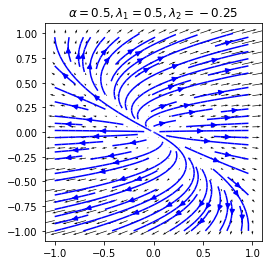

In [528]:
plot_data(alpha=0.5)

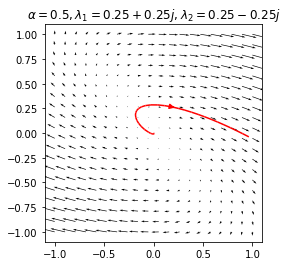

In [364]:
plot_data("alpha=0.5.png",alpha=0.5)

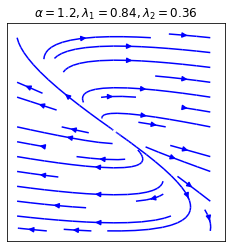

In [395]:
plot_data("alpha=1_All.png",alpha=1.2)

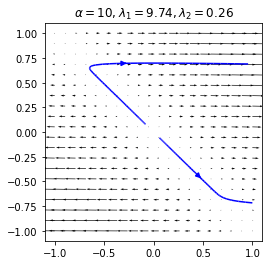

In [374]:
plot_data("alpha=10.png",alpha=10)

# Bifurcation of logistic map

In [4]:
def logistic(r, x):
    return r * x * (1 - x)

In [470]:
def plot_system(r, x0, n, ax=None):
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plotting the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)

        ax.plot([x], [y], 'ok', ms=10, alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")

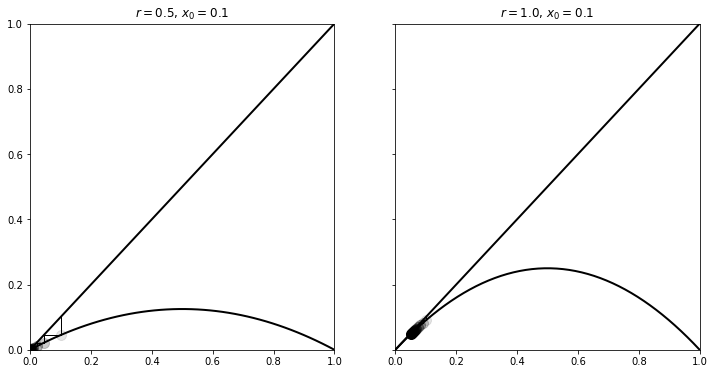

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(0.5, .1, 10, ax=ax1)
plot_system(1, .1, 10, ax=ax2)

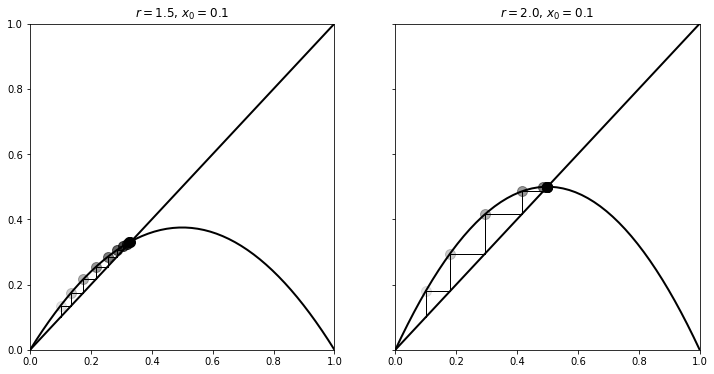

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(1.5, .1, 10, ax=ax1)
plot_system(2, .1, 10, ax=ax2)

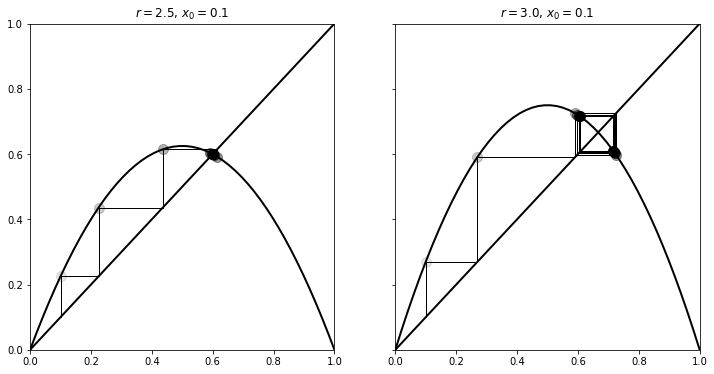

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3, .1, 10, ax=ax2)

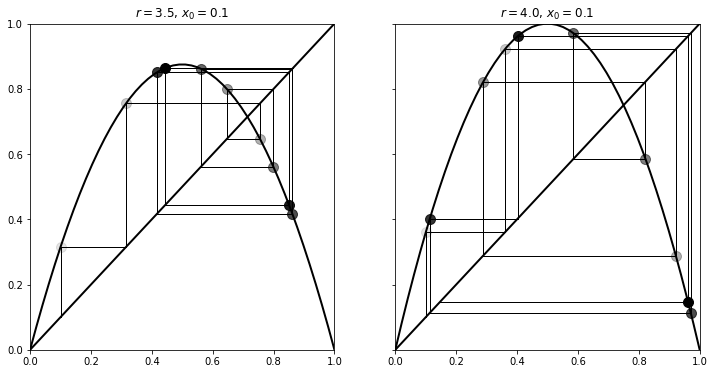

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(3.5, .1, 10, ax=ax1)
plot_system(4, .1, 10, ax=ax2)

## Plotting birfurcation diagram

Now, we simulate this system for 10000 values of r linearly spaced between 2.5 and 4, and vectorize the simulation with NumPy by considering a vector of independent systems (one dynamical system per parameter value):

In [36]:
n = 1000
r = np.linspace(0, 4, n)

We use 1000 iterations of the logistic map and keep the last 100 iterations to display the bifurcation diagram:

In [37]:
x = np.linspace(0, 1, n)

In [38]:
iterations = 1000
last = 100

We initialize our system with the same initial condition x0=0.00001:

In [39]:
x = 1e-5 * np.ones(n)

 Now, we simulate the system and plot the bifurcation diagram. The simulation only involves the iterative evaluation of the logistic() function on our vector x. Then, to display the bifurcation diagram, we draw one pixel per point x(r)n during the last 100 iterations:

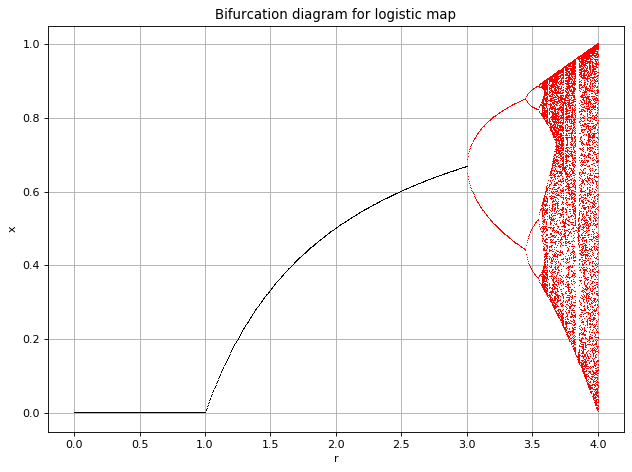

In [68]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6), dpi=80)

for i in range(iterations):
    x = logistic(r, x)
    if i >= (iterations - last):
        r3 = [j for j in r if j > 3]
        r1 = [j for j in r if j <= 3]
        x3 = x[len(r1):]
        x1 = x[:len(r1)]
        ax1.plot(r1, x1, ',k')
        ax1.plot(r3, x3, ',r')
ax1.grid()
ax1.set_title("Bifurcation diagram for logistic map")
plt.xlabel('r')
plt.ylabel('x')
plt.tight_layout()
plt.savefig("logistic_map.png", format="png")

In [41]:
def logistic_equation_orbit(name, seed, r, n_iter, n_skip=0):
 
    X_t=[]
    T=[]
    t=0
    x = seed;

    for i in range(n_iter + n_skip):
        if i >= n_skip:
            X_t.append(x)
            T.append(t)
            t+=1
        x = logistic(r,x);

    title = 'seed = {0}, r = {1}, iterations = {2}'.format(seed, r, n_iter)
    plt.title(title)
    plt.plot(T, X_t)
    plt.ylim(0, 1)
    plt.xlim(0, T[-1])
    plt.xlabel('Time n')
    plt.ylabel(r'$x_n$')
    plt.savefig(name, format="png")
    plt.show()
    

In [31]:
seedn = 0.00001

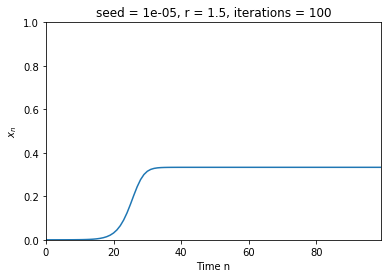

In [48]:
#logistic_equation_orbit("orbit0pt5.png", seedn, 0.5, 100)
logistic_equation_orbit("orbit1pt9.png",seedn, 1.5, 100)
#logistic_equation_orbit("orbit2pt5.png", seedn, 2.5, 100)
#logistic_equation_orbit("orbit3pt05.png", seedn, 3.05, 100,20)
#logistic_equation_orbit("orbit3pt9.png", seedn, 3.9, 100,20)

# Lorentz Attractor

In [19]:
def solve_lorenz(name="val10.png",x0=[], max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    #ax.axis('off')
    N = len(x0)
    
    colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    def lorenz_deriv(t0, x_y_z, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=lorenz_deriv, t_span=[0, 1000], y0=val, t_eval=t) for val in x0])
    
    for i in range(N):
        x = x_t[i].y[0, :]
        y = x_t[i].y[1, :]
        z = x_t[i].y[2, :]
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    #ax.view_init(30, angle)
    title = r'$x0 = {0}, \sigma={1}, \beta = {2}, \rho = {3}$'.format(x0, sigma,round(beta,2),rho)
    plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.savefig(name, format="png")
    plt.show()
    return t, x_t

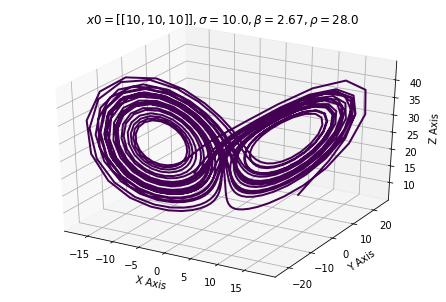

In [20]:
t, x_t = solve_lorenz("value10.png", x0=[[10,10,10]], max_time=30)

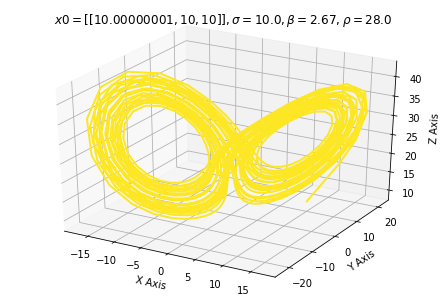

In [17]:
t1, x_t1 = solve_lorenz("value8.png", x0=[[10+10**-8, 10, 10]], max_time=30)

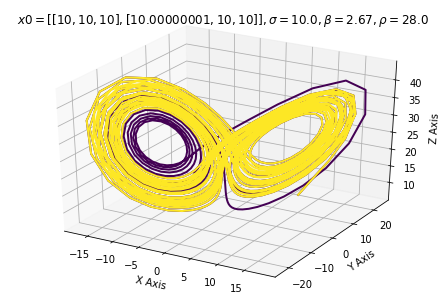

In [462]:
t, x_t = solve_lorenz("values_both.png", x0=[[10,10,10],[10+10**-8, 10, 10]], max_time=30)

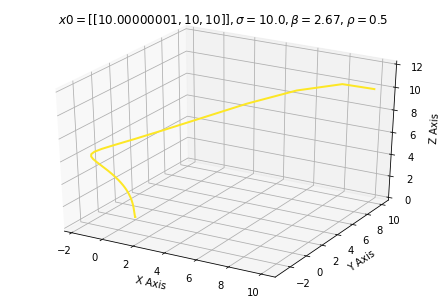

In [18]:
t1, x_t1 = solve_lorenz("value8_rpt5.png", x0=[[10+10**-8, 10, 10]], max_time=30, rho=0.5)

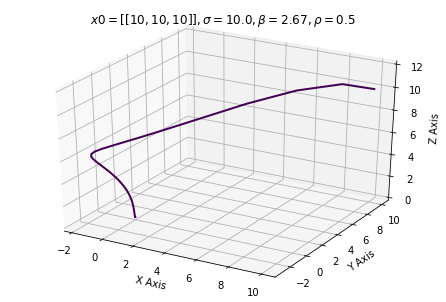

In [21]:
t1, x_t1 = solve_lorenz("value10_rpt5.png", x0=[[10, 10, 10]], max_time=30, rho=0.5)

## calculating difference between the points

In [471]:
def dist(x, y):
    x1,x2,x3 = x
    y1,y2,y3 = y
    return math.sqrt((x1-y1)**2 + (x2-y2)**2 + (x3-y3)**2)

In [442]:
def calculateDiff(val1, val2):
    res=[]
    for i in range(len(val1[0].y[0,:])):
        x=[val1[0].y[0, i], val1[0].y[1, i], val1[0].y[2, i]]
        y=[val2[0].y[0, i], val2[0].y[1, i],val2[0].y[2, i]]
        
        res.append(dist(x, y))
    return res

In [443]:
diff = calculateDiff(x_t, x_t1)

In [450]:
times= []
indices = []
for index,i in enumerate(diff):
    if index == 0:
        print(t[index])
    if i >= 1:
        times.append(t[index])
        indices.append(index)

print(indices)

0.0
[787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999]


In [469]:
print(diff[786])

0.8286613182241255
